In [5]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [6]:
ds_zarr = xr.open_zarr("SMAP_L3_SSS_20210105_8DAYS_V5.0.zarr")

In [7]:
ds_zarr

<xarray.Dataset>
Dimensions:               (latitude: 720, longitude: 1440, time: 1)
Coordinates:
  * latitude              (latitude) float32 89.875 89.625 ... -89.625 -89.875
  * longitude             (longitude) float32 -179.875 -179.625 ... 179.875
  * time                  (time) datetime64[ns] 2021-01-05T12:00:00
Data variables:
    anc_sss               (latitude, longitude) float32 dask.array<chunksize=(180, 720), meta=np.ndarray>
    anc_sst               (latitude, longitude) float32 dask.array<chunksize=(180, 720), meta=np.ndarray>
    ice_fraction          (latitude, longitude) float32 dask.array<chunksize=(180, 720), meta=np.ndarray>
    land_fraction         (latitude, longitude) float32 dask.array<chunksize=(180, 720), meta=np.ndarray>
    smap_high_spd         (latitude, longitude) float32 dask.array<chunksize=(180, 720), meta=np.ndarray>
    smap_spd              (latitude, longitude) float32 dask.array<chunksize=(180, 720), meta=np.ndarray>
    smap_sss              (latitude, longitude) float32 dask.array<chunksize=(180, 720), meta=np.ndarray>
    smap_sss_uncertainty  (latitude, longitude) float32 dask.array<chunksize=(180, 720), meta=np.ndarray>
    weight                (latitude, longitude) float32 dask.array<chunksize=(180, 720), meta=np.ndarray>
Attributes:
    Conventions:                 CF-1.6, ACDD-1.3
    Day:                         5
    Days_averaged:               8.0
    Gaussian_window_half_power:  30.0
    Gaussian_window_radius:      45.0
    Month:                       1
    TB_CRID:                     R17000
    Year:                        2021
    cdm_data_type:               Grid
    comment:                     Gaussian-weighted map gridding of SMAP L2B S...
    contributor_name:            Alexander Fore, Simon Yueh, Wenqing Tang, Ak...
    creator_email:               fore@jpl.nasa.gov
    creator_name:                JPL
    date_created:                2021-013T01:25:25.087
    date_issued:                 2021-013T01:25:25.087
    geospatial_lat_max:          90.0
    geospatial_lat_min:          -90.0
    geospatial_lat_units:        degrees_north
    geospatial_lon_max:          180.0
    geospatial_lon_min:          -180.0
    geospatial_lon_units:        degrees_east
    history:                     DATA_SOURCE_VERSION V5.0 L2B SMAP SSS/WSPD
    institution:                 Jet Propulsion Laboratory
    keywords:                    SEA SURFACE SALINITY, SALINITY, SMAP, Jet Pr...
    keywords_vocabulary:         http://gcmd.gsfc.nasa.gov/Resources/valids/g...
    l2b_files:                   SMAP_L2B_SSS_31619_20210101T123321_R17000_V5...
    platform:                    SMAP
    processing_level:            3
    product_version:             V5.0
    project:                     SMAP
    publisher_email:             fore@jpl.nasa.gov
    publisher_name:              Alexander G. Fore
    references:                  10.1109/TGRS.2016.2601486, 10.1109/TGRS.2016...
    revs_missing:                [31630, 31646, 31664, 31665, 31669, 31672, 3...
    revs_used:                   [31619, 31620, 31621, 31622, 31623, 31624, 3...
    sensor:                      SMAP
    source:                      SMAP L2B SSS
    time_coverage_end:           2021-009T12:00:00.000
    time_coverage_start:         2021-001T12:00:00.000
    title:                       SMAP 0.25x0.25 deg grid averaged 8-day SSS/WSPD

<ipython-input-8-ca82ec2e0bc7>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_under("black")
<ipython-input-8-ca82ec2e0bc7>:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_over("maroon")


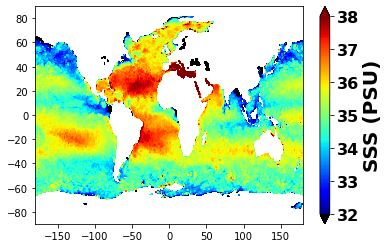

In [8]:
cmap=plt.get_cmap("jet")
cmap.set_under("black")
cmap.set_over("maroon")

clevs = np.linspace(32, 38, 101)

lons,lats = np.meshgrid(ds_zarr.longitude,ds_zarr.latitude)

cs=plt.contourf(lons,lats,ds_zarr.smap_sss, clevs, cmap=cmap, extend='both')

cb=plt.colorbar(cs)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=16, fontweight="bold")
cb.set_label('SSS (PSU)', fontsize=20,fontweight="bold")
cb.set_ticks(range(32,40,1))